In [1]:
# import needed libraries
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
Q = np.matrix([[-1, 0.5, 0.5], [0.5, -1, 0.5], [0.5, 1, -0.5]])

In [14]:
def simCTMC(Q, T, x0):
    # simulate a continuous time Markov Chain with transition matrix Q, holding time T and starting state x0
    states = range(0, len(Q)) # number of states
    XTrajectory = [x0] # document the movement of x between states
    xt = x0
    times = [0]
    timeCount = 0
    while (timeCount <= T):
        jumpToRates = np.delete(Q[xt,:], xt) # the rate of x jumping to each state
        jumpToStates = np.delete(states, xt) # the states where x can jump to next
        minClock = math.inf
        for state in jumpToStates:
            # x jumps to the state where the waiting time is shorter
            clock = np.random.exponential(1/Q[xt, state])
            if(clock < minClock):
                minClock = clock
                minState = state
        timeCount = timeCount + minClock
        if(timeCount <= T):
            xt = minState
            XTrajectory.append(xt)
            times.append(timeCount)
        if(timeCount > T):
            XTrajectory.append(xt)
            times.append(T)
    plt.plot(times, XTrajectory, drawstyle = "steps-post")
        
    

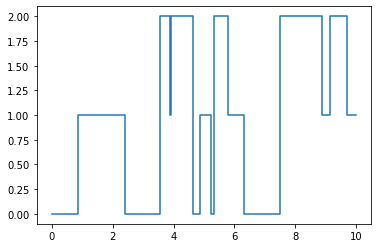

In [15]:
simCTMC(Q, 10, 0)